# Test libcurve.cpp - Image 2D

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.random.seed(0)
bool_img = np.random.randint(0, 2, (20,20), dtype=bool)
neigh1 = np.array([[True, False],[True, False]])
neigh2 = np.array([[False, True],[True, False]])
img = np.random.randint(0, 256, (10,10), dtype=int)
img[1, 1] = 243

In [3]:
from nice.utils import print_dir
from nice.plot import matplotlib_plot, imshow_colorspace, line
import euchar.cppbinding.utils as u
import euchar.cppbinding.curve as c
from euchar.display import euler_curve_plot

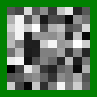

In [4]:
fig, ax = matplotlib_plot(figsize=(2,2), facecolor="g")
imshow_colorspace(ax, img, "BGR", title="")

In [5]:
print_dir(c)

Attributes and methods of <class 'module'> are:
---
__doc__
__file__                   | __loader__                 | __name__                   | __package__
__spec__                   | __version__                | filtration_2d              | image_2d
image_3d                   | naive_image_2d             | naive_image_3d             | 

### naive_image_2d vs image_2d

In [6]:
ecc_naive = np.array(c.naive_image_2d(img, 256))

vector_changes = u.vector_of_euler_changes_2d()
ecc = np.array(c.image_2d(img, vector_changes, 256))

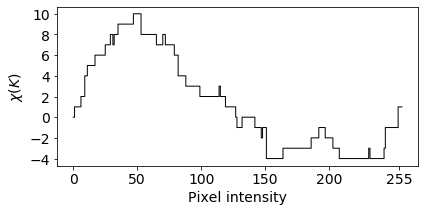

In [7]:
fig, ax = matplotlib_plot(figsize=(6,3))
euler_curve_plot(ax, ecc, xticks=[0, 50, 100, 150, 200, 255], yticks=[-4, -2, 0, 2, 4, 6, 8, 10])

For many images

In [8]:
images = [np.random.randint(0, 256, (32,32), dtype=int) for _ in range(20)]
list_bool = [(np.array(c.naive_image_2d(img, 256)) == np.array(c.image_2d(img, vector_changes, 256))).all()
             for img in images]
print(all(list_bool))

True
